 # Tensor Algebra

## Outline
* What is Tensor?
* Quick introduction to ***Numpy***
* Basic Vector Algebra 
* Basic Matrix Algebra
* Eigen Values - Problems and Applications
* Singular Value Decomposition


<div class="slide-title">
    <h3><font color="red">Disclaimer</font></h3>
    <b>This is not a math class!</b><br>
    <ul>
    <li> Terms and concepts are introduced as needed
    <li> NOT complete!
    </ul>
</div>

## What is a Tensor? 

In mathematics, a **tensor** is a geometric object that maps in a multi-linear manner geometric vectors, scalars, and other tensors to a resulting tensor. **Vectors and scalars** which are often used in elementary physics and engineering applications, are considered as the simplest tensors...<br>
An elementary example of mapping, describable as a tensor, is the **dot product**, which maps two vectors to a scalar. ..." [Wikipedia]

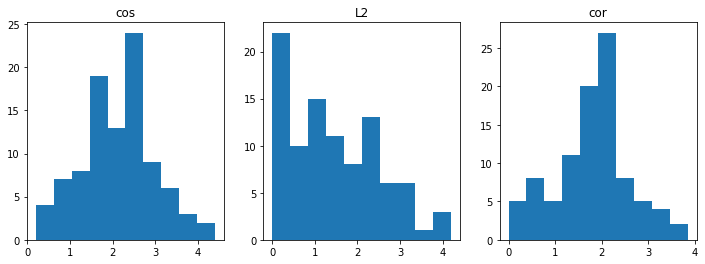

In [37]:
fig=plt.figure(figsize=(12, 4))
ax1=fig.add_subplot(1, 3, 1)
ax1.title.set_text('cos')
plt.hist(test_cos)
ax2= fig.add_subplot(1, 3, 2)
ax2.title.set_text('L2')
plt.hist(test_L2)
ax3=fig.add_subplot(1, 3, 3)
ax3.title.set_text('cor')
plt.hist(test_cor)
plt.show()




## NumPy - A Python Library for Arrays and Tensors  

<center>
    <img src="IMG/numpy.jpeg">
    <br><br>
    <A HREF="https://docs.scipy.org/doc/numpy/">https://docs.scipy.org/doc/numpy/</A>
</center>

In [1]:
#comunity convention to name numpy "np"
import numpy as np

NumPy introduction "on the fly" - detailed intro this afternoon in the Lab session.

## Vector Arithmetic
Let's start simple: recall vector notation and some basic vector algebra.

Notation: we wrtite $\vec{a}$ to denote elements of some vector space, e.g. $\vec{a} \in \mathbb{R}^n$

$\vec{a} := (a_0, a_1, \dots, a_n), a_i \in \mathbb{R}$

See https://en.wikipedia.org/wiki/Vector_space for formal definition of vector spaces.

In [2]:
#in numpy we define vectors as 1D arrays
a=np.array([1,2,3,4])
a

array([1, 2, 3, 4])

### Basic Vector opperations
For some example vector space $\mathbb{R}^n$
* addition: $\vec{c} = \vec{a}+\vec{b} \rightarrow : \forall a,b \in \mathbb{R}^n: c \in \mathbb{R}^n$

* scalar multiplocation: $ h \vec{a}, h \in \mathbb{R} := (ha_0,ha_1,\dots ha_n) $

* **dot product**: $<\vec{a},\vec{b}> := c$ ,where $c \in \mathbb{R}$ 

In [3]:
#in numpy:
a=np.random.random(4)
b=np.random.random(4)
a+b*5

array([1.22282799, 5.70373775, 3.43520862, 1.8092921 ])

In [5]:
#WARNING:
a*b #element wise mult

array([0.06515602, 0.8126334 , 0.18702152, 0.12043503])

In [6]:
a.dot(b) #this is a dot product !

1.1852459797574624

### Some more important vector opperations:
* vector norm (formal): $\|\vec{a}\| := \sqrt{<\vec{a},\vec{a}> } $
* eucledian norm: $\|\vec{a}\|_2 := \sqrt{\sum_i a_i^2 } $


In [7]:
#in numpy
a=np.array([2,2,2])
np.linalg.norm(a)

3.4641016151377544

### Some more important vector opperations:
* vector norm (formal): $\|\vec{a}\| := \sqrt{<\vec{a},\vec{a}> } $
* eucledian norm: $\|\vec{a}\|_2 := \sqrt{\sum_i a_i^2 } $
* outer product (dyadic product): $\vec{a} \otimes \vec{b} := \vec{a}\vec{b}^T$ (Matrix product)

## Matrix Algebra

### Definition
A **matrix** $A$ is defined as a $m \times n$ 2d tensor (rank 2):
$A := \left(\begin{matrix} a_{00} & a_{01} & \dots & a_{0n}\\ \vdots & &  & \vdots\\a_{m0} & a_{m1}& \dots &a_{mn} \end{matrix} \right) $

* e.g. with $m$ **row vectors** $\in \mathbb{R}^n$ and $n$ **column vectors** $\in \mathbb{R}^m$
* $\forall a_{ij} \in \mathbb{R}$

In [8]:
#in numpy
A=np.array([[1,2,3,4],[1,2,3,4],[5,6,7,8]])
A

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [5, 6, 7, 8]])

#### Motivation I: Matrix as data structure
* e.g. to store and process distances between objects
<img src="IMG/D.png" width="300">
* we will see many examples where matricies hold
   * distances 
   * correlations
   * afinity in graphs 
   * ...

#### Motivation II: linear mappings / equation systems
Write system of linear equations
<img src="IMG/lin_eq.svg">
as $Ax = b$ with
<img src="IMG/lin_mat.svg">

In [9]:
# NumPy: Solve the system of equations 
#
# 3 * x0 + x1 = 9 and 
# x0 + 2 * x1 = 8:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
np.linalg.solve(a, b)

array([2., 3.])

#### Motivation III: Matrices as operators (tensors)
Matrices are widely use as operators (tensors) to apply transformations (mappings) on data vectors. E.g., to represent affine transformations with matrices, we can use **homogeneous coordinates**. This means representing a 2-vector $(x, y)$ as a 3-vector $(x, y, 1)$.

$\vec{a}' = A\vec{a}$

Example: transformations of the unit square in $\mathbb{R}^2$ [wikipedia].
<img src="IMG/mat_op.png">

### Special types of Matrices
* **Unit Matrix** (or Identity Matrix): $I_n := \left(\begin{matrix} 1 & 0 & 0 &\dots & 0\\ 0 & 1 & 0 & \dots & 0\\ \vdots & & & & \vdots\\ 0 & \dots& 0 & 1 & 0\\0 & 0& \dots & 0& 1 \end{matrix} \right)$
with $I_mA = AI_n = A$
<br><br>
* **Symmetric Matrix**: square Matrix $(m=n)$ where $A^T=A$  
<BR><BR>

* **Diagonal Matrix**: square Matrix where $a_{mn} := 0, \quad\forall m\neq m$ 


In [10]:
#in numpy
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [11]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Matrix Arithmetic
* **adding matrices** (element wise): $C := A + B$, where $c_{ij} := a_{ij}+b_{ij}  \forall i\in m, j \in n   $
<br><br>
* **skalar multiplication**: $C := hA$, where $c_{ij} := ha_{ij}  \forall i\in m, j \in n   $


* **inner product** (matrix multiplication):
<img SRC="IMG/matmul.gif">
https://www.reddit.com/r/educationalgifs/comments/5il2xm/matrix_multiplication/

#### Matrix Inverse

The inverse $A^{-1}$ of a quadratic Matrix $A$ is defined as: $A^{-1}A = AA^{-1} = I$

**Complexity:** $O(n^3)$ whens solving the above equation via Gauss-Jorden.
https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

## Changing the Basis of a Vector Space

#### Definition:
a **set** B of elements (**vectors**) in a **vector space** $V$ is called a **basis**, if every element of $V$ may be written in a unique way as a (finite) **linear combination** of elements of B. The coefficients of this linear combination are referred to as components or **coordinates** on B of the vector. The elements of a basis are called basis vectors [wikipedia].

#### Simple Example:
In $\mathbb{R}^2$, the ***eucledian*** basis is the set of the two vectors $\vec{e_0} := (1,0)^T, \vec{e_1} := (0,1)^T$.
    
Every point $\vec{p}:=(p_0,p_1) \in \mathbb{R}^2$ can be expressed by it's **coordinates** $x,y$ in the form of $p_0:=x\vec{e_0}$ and $p_1:=y\vec{e_1}$   

<img src="IMG/basis1.png">

#### Alternative Basis
The basis of vector space is not unique: it is very easy to find new sets of basis vectors.  

<img src="IMG/basis2.png">

#### Optional Properties of Basis Sets
* othortogonal
* orthonormal 

#### Changing the Basis


## Eigen Decomposition

One of the re-accuring questions is: how to find the ***"best"*** basis for a given problem/data. Decomposition into ***Eigen Values*** and ***Eigen Vectors*** provide a comon solution:

#### Definition
An eigenvector of a linear transformation $T$ is a non-zero vector that changes by only a scalar factor when that linear transformation is applied to it. This condition can be written as:

$ T(\mathbf {v} )=\lambda \mathbf {v} $

where $\lambda$ is a scalar, known as the ***eigenvalue*** associated with the ***eigenvector*** v.

If the vector space $V$ is finite-dimensional, then the linear transformation $T$ can be represented as a **square matrix $A$** , and the vector $v$ by a **column vector**, rendering the above mapping as a matrix multiplication on the left-hand side and a scaling of the column vector on the right-hand side in the equation [wikipedia]

$ A\mathbf {v} =\lambda \mathbf {v}$ 

#### Eigen Decomposition
for a squared, diagonizable matrix $M$ of size $n \times n$:

* we can find $n$ **eigen vectors** $q_i$ with **eigen values** $\lambda_i$ 

* we can decompose $M$ into $M = Q \Lambda Q^{-1} $
    * where $Q$ is a matrix of the eigenvectors
    * $\Lambda$ a diagonal matrix with the $\lambda_i$ on the diagonal

#### Intuition
* Number of non zero eigenvalues gives the "intrinsic dimension/rank" of the data
* Eigenvectors form **new basis**

In [12]:
#a numpy example
A=np.diag((1, 1, 0))
A

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [13]:
v,V=np.linalg.eig(A)
print(v)

[1. 1. 0.]


In [14]:
print(V)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [15]:
#a bit more complex example
A=np.array([[1,1,0,0],[3,3,0,0],[2,2,0,0],[4,4,0,0]])
v,V=np.linalg.eig(A)

In [17]:
v[3]*V[3,:]

array([ 0.        ,  4.        ,  0.        , -2.92118697])

#### Problems with Eigen Decompositions 
* only for diagonizable, quared marticies
* but, matricies hoding data are usually not square (more data samples than data dimensions)

## Sigular Value Decomposition

#### Definition [wikipedia]: 
Suppose $M$ is a $m \times n$ matrix whose entries come from the field of real numbers or the field of complex numbers. Then there exists a factorization, called a **singular value decomposition** of $M$, of the form

$ \mathbf {M} =\mathbf {U} {\boldsymbol {\Sigma }}\mathbf {V} ^{*}$

where

* $U$ is an $m \times m$ unitary ($U^*U=I$) matrix,
* $\Sigma$ is a diagonal $m \times n$ matrix with non-negative real numbers, the **singular values**, on the diagonal,
* $V$ is an $n \times n$ unitary matrix, and $V^∗$ is the conjugate transpose of $V$.



**Intuition:** $M$ is an $m \times$ m real square matrix with positive determinant: $U, V^*$, and $\Sigma$ are real $m \times m$ matrices as well. $\Sigma$ can be regarded as a **scaling** matrix, and $U, V^∗$ can be viewed as **rotation** matrices [wikipedia]:

<img src="IMG/svg.png" width=500>

In [18]:
#example 
M = np.array([ [1, 0, 0, 0], [0,0,0,2], [0,3,0,0], [0,0,0,0], [2,0,0,0] ])
print(M)
U,S,V = np.linalg.svd(M)

[[1 0 0 0]
 [0 0 0 2]
 [0 3 0 0]
 [0 0 0 0]
 [2 0 0 0]]


In [19]:
U

array([[ 0.        , -0.4472136 ,  0.        ,  0.        , -0.89442719],
       [ 0.        ,  0.        , -1.        ,  0.        ,  0.        ],
       [-1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        , -0.89442719,  0.        ,  0.        ,  0.4472136 ]])

In [20]:
S

array([3.        , 2.23606798, 2.        , 0.        ])

In [21]:
V

array([[-0., -1., -0., -0.],
       [-1., -0., -0., -0.],
       [-0., -0., -0., -1.],
       [-0., -0., -1., -0.]])

In [22]:
#now: reconstruct M
np.dot(U[:,:4]*S,V)

array([[1., 0., 0., 0.],
       [0., 0., 0., 2.],
       [0., 3., 0., 0.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.]])

In [23]:
#now reconstruct with loss, using only th first 2 of 4 singular values
np.dot(U[:,:2]*S[:2],V[:2,:])

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.]])

## Let's apply SVD to our recommender matrix $R$ ...